<a href="https://colab.research.google.com/github/Fatemeh-Vahidnezhad/MY-PROJECTS/blob/main/Dermatology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import shutil

##Download the dataset from kaggle into google Colab

In [2]:
!pip install kaggle

In [3]:
!mkdir ~/.kaggle

Uploading the kaggle.json into this directory(/content)

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d syedaun/dermatology

 94% 303M/321M [00:01<00:00, 240MB/s]
100% 321M/321M [00:01<00:00, 185MB/s]


In [7]:
!unzip dermatology.zip

Archive:  dermatology.zip
  inflating: Dataset/test/Acne and Rosacea Photos/07PerioralDermEye.jpg  
  inflating: Dataset/test/Acne and Rosacea Photos/07Rhinophyma1.jpg  
  inflating: Dataset/test/Acne and Rosacea Photos/07RosaceaFulFAce.jpg  
  inflating: Dataset/test/Acne and Rosacea Photos/07RosaceaMilia0120.jpg  
  inflating: Dataset/test/Acne and Rosacea Photos/07RosaceaOK0828063.jpg  
  inflating: Dataset/test/Acne and Rosacea Photos/07SteroidPerioral.jpg  
  inflating: Dataset/test/Acne and Rosacea Photos/07SteroidPerioral1.jpg  
  inflating: Dataset/test/Acne and Rosacea Photos/07VascularFace0120.jpg  
  inflating: Dataset/test/Acne and Rosacea Photos/07rhnophymas0321051.jpg  
  inflating: Dataset/test/Acne and Rosacea Photos/07sebDerem1101051.jpg  
  inflating: Dataset/test/Acne and Rosacea Photos/08PerioralDerm1.jpg  
  inflating: Dataset/test/Acne and Rosacea Photos/ComedonesEars-1.jpg  
  inflating: Dataset/test/Acne and Rosacea Photos/Sebaceous-glands-Areola-4.jpg  
  infla



```
# This is formatted as code
```

# Define Validation set into the google colab

Computing Number of images in each category in the train set

In [8]:
num_img_train= []
train_dir = '/content/Dataset/train'
train_cat = os.listdir(train_dir)                    #name of each sub folder
print(train_cat)
for name in train_cat:
  dirr = train_dir + "/" + name
  num_img_train.append(len(os.listdir(dirr)))
print(num_img_train)                                 #number of images in every folder in train set 


['Atopic Dermatitis Photos', 'Systemic Disease', 'Acne and Rosacea Photos', 'Psoriasis pictures Lichen Planus and related diseases', 'Lupus and other Connective Tissue diseases', 'Exanthems and Drug Eruptions', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Melanoma Skin Cancer Nevi and Moles', 'Vasculitis Photos', 'Poison Ivy Photos and other Contact Dermatitis', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Eczema Photos', 'Urticaria Hives', 'Vascular Tumors', 'Herpes HPV and other STDs Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Warts Molluscum and other Viral Infections', 'Seborrheic Keratoses and other Benign Tumors', 'Light Diseases and Disorders of Pigmentation']
[100, 81, 840, 62, 90, 20, 122, 24, 15, 62, 322, 35, 3, 101, 40, 65, 248, 80, 299]


removing categories with lower than 150 images
* creating a dictionary from the name of categories and the number of images in each categories
* removing the categories with lower than 150 images

In [9]:
dic = {}
for key in train_cat:
  for value in num_img_train:
    dic[key] = value 
    num_img_train.remove(value)
    break
dic    

{'Acne and Rosacea Photos': 840,
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions': 322,
 'Atopic Dermatitis Photos': 100,
 'Cellulitis Impetigo and other Bacterial Infections': 65,
 'Eczema Photos': 35,
 'Exanthems and Drug Eruptions': 20,
 'Herpes HPV and other STDs Photos': 40,
 'Light Diseases and Disorders of Pigmentation': 299,
 'Lupus and other Connective Tissue diseases': 90,
 'Melanoma Skin Cancer Nevi and Moles': 24,
 'Poison Ivy Photos and other Contact Dermatitis': 62,
 'Psoriasis pictures Lichen Planus and related diseases': 62,
 'Seborrheic Keratoses and other Benign Tumors': 80,
 'Systemic Disease': 81,
 'Tinea Ringworm Candidiasis and other Fungal Infections': 122,
 'Urticaria Hives': 3,
 'Vascular Tumors': 101,
 'Vasculitis Photos': 15,
 'Warts Molluscum and other Viral Infections': 248}

In [10]:
for key, value in dic.items():
  if value < 150:
    print(key, value)
    dir = train_dir + '/' + key
    # print(dir)
    shutil.rmtree(dir)      #remove a directory and it's images

Atopic Dermatitis Photos 100
/content/Dataset/train/Atopic Dermatitis Photos
Systemic Disease 81
/content/Dataset/train/Systemic Disease
Psoriasis pictures Lichen Planus and related diseases 62
/content/Dataset/train/Psoriasis pictures Lichen Planus and related diseases
Lupus and other Connective Tissue diseases 90
/content/Dataset/train/Lupus and other Connective Tissue diseases
Exanthems and Drug Eruptions 20
/content/Dataset/train/Exanthems and Drug Eruptions
Tinea Ringworm Candidiasis and other Fungal Infections 122
/content/Dataset/train/Tinea Ringworm Candidiasis and other Fungal Infections
Melanoma Skin Cancer Nevi and Moles 24
/content/Dataset/train/Melanoma Skin Cancer Nevi and Moles
Vasculitis Photos 15
/content/Dataset/train/Vasculitis Photos
Poison Ivy Photos and other Contact Dermatitis 62
/content/Dataset/train/Poison Ivy Photos and other Contact Dermatitis
Eczema Photos 35
/content/Dataset/train/Eczema Photos
Urticaria Hives 3
/content/Dataset/train/Urticaria Hives
Vascu

Making validation directory and copying 25 percent of the train set into the validation set

In [11]:
base_dir = '/content/Dataset'
train_dir = '/content/Dataset/train'
val_directory = base_dir + '/' + 'Validation'
test_directory = '/content/Dataset/test'
os.mkdir(val_directory)


In [12]:
def make_ValidationSet(): 
    for category in os.listdir(train_dir):
        dir = val_directory + '/' + category
        os.mkdir(dir)
        counter = 0
        fnames = os.listdir(train_dir + '/' + category)
        random.shuffle(fnames)
        for fname in fnames:
            if counter <= 0.25* len(fnames):
                shutil.copyfile(src =train_dir + '/' + category + '/' + fname  , dst = dir + '/' + fname )
                counter += 1
            else:
#                 print(counter)
                break
                                
            
make_ValidationSet()       

Removing redundent categories on the test dataset:

In [13]:
train_category = os.listdir(train_dir)
for cat in os.listdir(test_directory):
  if cat not in train_category:
    dir_test = test_directory + '/' + cat
    shutil.rmtree(dir_test)

computing the number of images at the each category of the datasets:

In [14]:
def Num_img(path_dirctory):
  path_cat = os.listdir(path_dirctory)
  lst_num_img = []
  for img in path_cat:
    dirc = path_dirctory + '/' + img
    lst_num_img.append(len(os.listdir(dirc)))
  return lst_num_img
lst_img_tst = Num_img(test_directory)    #number of images at each category in the test dataset
lst_img = Num_img(train_dir)             #number of images at each category in the train dataset
num_img_val = Num_img(val_directory)     #number of images at each category in the Validation dataset


##Visualizing the number of images on each dataset

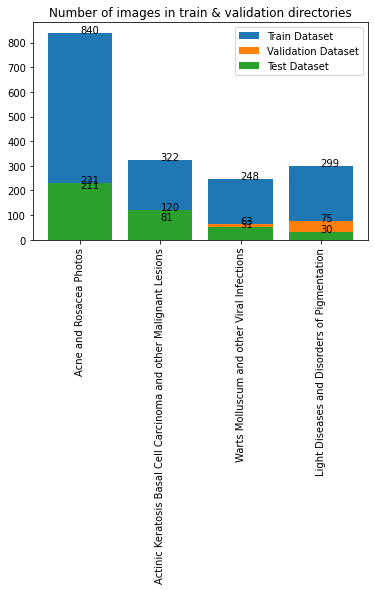

In [15]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
plt.bar(train_category, lst_img)
addlabels(train_category, lst_img)
plt.xticks(rotation = 90)

plt.bar(train_category, num_img_val)
addlabels(train_category, num_img_val)

plt.bar(train_category, lst_img_tst)
addlabels(train_category, lst_img_tst)

plt.legend(['Train Dataset', 'Validation Dataset', 'Test Dataset'])
plt.title("Number of images in train & validation directories")
plt.show()

 Data Preprocessing

In [16]:
from tensorflow.keras.utils import image_dataset_from_directory

In [17]:
batch_size = 16
img_height = 224
img_width = 224
train_dataset = image_dataset_from_directory(train_dir, image_size = (img_height, img_width ),
                                             batch_size = batch_size, labels='inferred',
                                             label_mode='int')

Validation_dataset = image_dataset_from_directory(val_directory, image_size = (img_height, img_width ),
                                             batch_size = batch_size, labels='inferred', label_mode='int')

test_dataset = image_dataset_from_directory(test_directory, image_size = (img_height, img_width ),
                                             batch_size = batch_size, labels='inferred', label_mode='int')


Found 1709 files belonging to 4 classes.
Found 430 files belonging to 4 classes.
Found 432 files belonging to 4 classes.


The name of Classes

In [18]:
print('categories of train dataset:\n ',train_dataset.class_names)
print('\ncategories of validation dataset: \n', Validation_dataset.class_names)

categories of train dataset:
  ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Light Diseases and Disorders of Pigmentation', 'Warts Molluscum and other Viral Infections']

categories of validation dataset: 
 ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Light Diseases and Disorders of Pigmentation', 'Warts Molluscum and other Viral Infections']


In [ ]:
for img_batch, label_batch in train_dataset:
    print(img_batch.shape)
    print(label_batch.shape)
    break

(16, 224, 224, 3)
(16,)


Visualizing several images

In [ ]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

shape of images

In [ ]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  images.shape

<Figure size 720x720 with 0 Axes>

# Defining a model

In [ ]:
from tensorflow.keras import layers, regularizers


In [ ]:
Input = keras.Input(shape = (180, 180, 3))
layer1 = layers.Conv2D(128, (3,3), padding = 'same', activation = 'relu', kernel_regularizer = regularizers.l2(0.01))(Input)
layer2 = layers.MaxPool2D(pool_size = (2,2))(layer1)
layer3 = layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu', kernel_regularizer = regularizers.l2(0.01))(layer2)
layer4 = layers.MaxPool2D(pool_size = (2,2))(layer3)
layer5 = layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu', kernel_regularizer = regularizers.l2(0.01))(layer4)
layer6 = layers.Flatten()(layer5)
layer7 = layers.Dense(19, activation = 'softmax')(layer6)
model = keras.Model(inputs = Input, outputs = layer7 )


In [ ]:
model.compile( metrics = ['accuracy'],
    optimizer = keras.optimizers.Adam(),
    loss = keras.losses.SparseCategoricalCrossentropy())

In [ ]:
history = model.fit(img_train_batch, labels_train_batch,
                    verbose = 2,
                    epochs = 50,
                    batch_size = 16,
                    validation_data =(img_val_batch, labels_val_batch) 
                   )

Epoch 1/50
1/1 - 4s - loss: 4.2424 - accuracy: 0.0000e+00 - val_loss: 5.6556 - val_accuracy: 0.4375 - 4s/epoch - 4s/step
Epoch 2/50
1/1 - 2s - loss: 3.1907 - accuracy: 0.3125 - val_loss: 5.7056 - val_accuracy: 0.4375 - 2s/epoch - 2s/step
Epoch 3/50
1/1 - 2s - loss: 3.1920 - accuracy: 0.3125 - val_loss: 4.5057 - val_accuracy: 0.4375 - 2s/epoch - 2s/step
Epoch 4/50
1/1 - 2s - loss: 3.0021 - accuracy: 0.3750 - val_loss: 4.8774 - val_accuracy: 0.4375 - 2s/epoch - 2s/step
Epoch 5/50
1/1 - 2s - loss: 2.8259 - accuracy: 0.5625 - val_loss: 6.1057 - val_accuracy: 0.4375 - 2s/epoch - 2s/step
Epoch 6/50
1/1 - 2s - loss: 2.5630 - accuracy: 0.5000 - val_loss: 8.3128 - val_accuracy: 0.3750 - 2s/epoch - 2s/step
Epoch 7/50
1/1 - 2s - loss: 2.2743 - accuracy: 0.5625 - val_loss: 12.1040 - val_accuracy: 0.0000e+00 - 2s/epoch - 2s/step
Epoch 8/50
1/1 - 2s - loss: 2.0748 - accuracy: 0.6875 - val_loss: 15.2553 - val_accuracy: 0.2500 - 2s/epoch - 2s/step
Epoch 9/50
1/1 - 2s - loss: 1.8490 - accuracy: 0.6875 

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

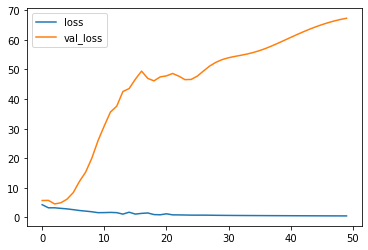

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(history.history['loss'])),history.history['loss'])
plt.plot(range(len(history.history['val_loss'])),history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

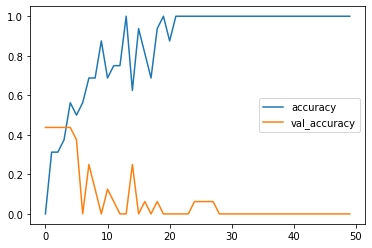

In [ ]:
plt.plot(range(len(history.history['accuracy'])),history.history['accuracy'])
plt.plot(range(len(history.history['val_accuracy'])),history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

#Using Data Augmentation

In [19]:
data_augmentation = keras.Sequential(
    [
     layers.RandomFlip('horizontal'),
     layers.RandomRotation(0.1),
     layers.RandomZoom(0.2)
    ]
)

#Using Pretrained model MobileNetV2

In [20]:
base_model_mobl = tf.keras.applications.MobileNetV2(
    input_shape= (224, 224, 3),
    include_top=False,
    weights='imagenet'
    )
base_model_mobl.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

In [21]:
base_model_mobl.trainable = True
for layer in base_model_mobl.layers[:-4]:
    layer.trainable = False 

# Using pretrained model-VGG16

In [ ]:
conv_base_vgg = keras.applications.vgg16.VGG16(
    weights = "imagenet",
    include_top = False
    ,input_shape = (224, 224, 3)
)
conv_base_vgg.summary()

In [ ]:
conv_base_vgg.trainable = True
for layer in conv_base_vgg.layers[:-4]:
    layer.trainable = False 

##Using conv_base model and data augmentation

In [24]:
Input = keras.Input(shape = (224, 224, 3))
x = data_augmentation(Input)
x = layers.Rescaling(1/255.0)(x)
x = keras.applications.mobilenet_v2.preprocess_input(x)
# x = keras.applications.vgg16.preprocess_input(x)
# x = conv_base_vgg(x)
x = base_model_mobl(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation = 'relu')(x)
x = layers.Dropout(0.5)(x)
x = keras.layers.Dense(128, activation = 'relu')(x)
x = layers.Dropout(0.5)(x)
x = keras.layers.Dense(64, activation = 'relu')(x)
x = layers.Dropout(0.5)(x)
x = keras.layers.Dense(32, activation = 'relu')(x)
x = layers.Dropout(0.5)(x)
output = keras.layers.Dense(4, activation = 'softmax')(x)
model = keras.Model(inputs = Input, outputs= output)

In [25]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [26]:
callbacks = [keras.callbacks.ModelCheckpoint(
    filepath = 'fine_tuning_keras',
     save_best_only = True,
     monitor = 'val_loss'
)]

In [27]:
history = model.fit(train_dataset, 
                    validation_data = Validation_dataset, 
                    epochs = 150, 
                    verbose = 2
                    , callbacks = callbacks)

Epoch 1/150
INFO:tensorflow:Assets written to: fine_tuning_keras/assets
107/107 - 52s - loss: 2.9964 - accuracy: 0.4301 - val_loss: 1.2863 - val_accuracy: 0.4907 - 52s/epoch - 488ms/step
Epoch 2/150
INFO:tensorflow:Assets written to: fine_tuning_keras/assets
107/107 - 35s - loss: 1.2994 - accuracy: 0.4909 - val_loss: 1.2649 - val_accuracy: 0.4907 - 35s/epoch - 323ms/step
Epoch 3/150
INFO:tensorflow:Assets written to: fine_tuning_keras/assets
107/107 - 36s - loss: 1.2677 - accuracy: 0.4915 - val_loss: 1.2578 - val_accuracy: 0.4907 - 36s/epoch - 337ms/step
Epoch 4/150
INFO:tensorflow:Assets written to: fine_tuning_keras/assets
107/107 - 36s - loss: 1.2608 - accuracy: 0.4915 - val_loss: 1.2529 - val_accuracy: 0.4907 - 36s/epoch - 337ms/step
Epoch 5/150
INFO:tensorflow:Assets written to: fine_tuning_keras/assets
107/107 - 35s - loss: 1.2645 - accuracy: 0.4915 - val_loss: 1.2519 - val_accuracy: 0.4907 - 35s/epoch - 331ms/step
Epoch 6/150
INFO:tensorflow:Assets written to: fine_tuning_keras/

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

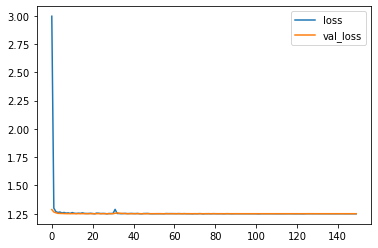

In [31]:
plt.plot(range(len(history.history['loss'])), history.history['loss'])
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

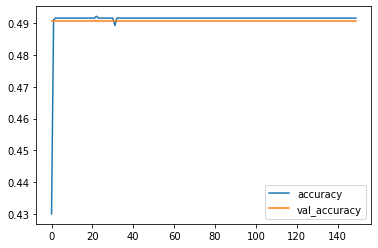

In [29]:
plt.plot(range(len(history.history['accuracy'])), history.history['accuracy'])
plt.plot(range(len(history.history['val_accuracy'])), history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

#Evaluate the test dataset

In [30]:
model = keras.models.load_model("fine_tuning_keras")
test_loss, test_acc = model.evaluate(test_dataset, verbose = 2)
print(test_loss, test_acc)

27/27 - 3s - loss: 1.1931 - accuracy: 0.5347 - 3s/epoch - 108ms/step
1.1930615901947021 0.5347222089767456
